In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /dev/shm/7

In [3]:
!cp -r /content/drive/MyDrive/Data/7/train_dataset/ /dev/shm/7

In [ ]:
!cp -r /content/drive/MyDrive/Data/7/test_dataset/ /dev/shm/7

In [2]:
!cp -r /content/drive/MyDrive/Data/input_train /dev/shm/

In [3]:
!cp -r /content/drive/MyDrive/Data/input_test /dev/shm/

In [4]:
!pip install -q "ollama<0.4"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.8.0 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.2 which is incompatible.


In [5]:
!pip install -q "numpy<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.0 MB/s eta 0:00:00


In [6]:
!pip install -q "anomalib[full]<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.6/486.6 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.0/726.0 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 16.2 MB/s e

In [7]:
!pip install -q "torch<2.6" torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 102.5 MB/s eta 0:00:00


In [ ]:
import os
os._exit(0)

In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
image_size_x = 256
image_size_y = 256
train_folder = "8/train_dataset"
model_folder = "/content/drive/MyDrive/Data/8/CFlow"

In [4]:
# Import the datamodule
from anomalib.data import Folder
from anomalib.models import Patchcore, Padim, Uflow, EfficientAd, Cflow
from anomalib.engine import Engine
from anomalib.deploy import ExportType
from anomalib.data.utils import TestSplitMode

# Create the datamodule
datamodule = Folder(
    name="data",
    root="/dev/shm/",
    normal_dir=train_folder,
    task="classification",
    #train_batch_size=32,
    num_workers=2,
    #test_split_mode=TestSplitMode.SYNTHETIC,
    test_split_ratio=0.2,
    # See this !!!!!
    image_size=(image_size_x, image_size_y)
)

# Setup the datamodule
datamodule.setup()

# Access the datasets
train_dataset = datamodule.train_data
train_dataloader = datamodule.train_dataloader()

# Create the model and engine
#model = Patchcore()
model = Cflow()
engine = Engine(max_epochs=3)

# Train a Patchcore model on the given datamodule
engine.fit(datamodule=datamodule, model=model)

print("Export weights...")
path_export_weights = engine.export(export_type=ExportType.TORCH,
                                    model=model,
                                    export_root=model_folder)

print("path_export_weights: ", path_export_weights)

/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/276M [00:00<?, ?B/s]

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name                  | Type                     | Params | Mode 
---------------------------------------------------------------------------
0 | model                 | CflowModel               | 236 M  | train
1 | _transform            | Compose                  | 0      | train
2 | normalization_metrics | MetricCollection         | 0      | train
3 | image_threshold       | F1AdaptiveThreshold      | 0      | train
4 | pixel_threshold       | F1AdaptiveThreshold      | 0 

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/core/module.py:512: You called `self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples found in target, recall is undefined. Setting recall to one for all thresholds.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=3` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Export weights...
path_export_weights:  /content/drive/MyDrive/Data/7/CFlow/weights/torch/model.pt


In [ ]:
path_export_weights = engine.export(export_type=ExportType.TORCH,
                                    model=model,
                                    export_root="/content/drive/MyDrive/Data/3")

In [5]:
from google.colab import runtime
runtime.unassign()

# Testing

In [1]:
test_csv_path = "/content/drive/MyDrive/Data/8/test.csv"
model_path = "/content/drive/MyDrive/Data/8/EfficientAD/weights/torch/model.pt"

In [2]:
import os
import pandas as pd
import numpy as np
from anomalib.deploy import TorchInferencer

# Load the test CSV file.
test_df = pd.read_csv(test_csv_path)

# Instantiate the TorchInferencer.
inferencer = TorchInferencer(
    path=model_path,
    device="gpu"
)

# Directory containing the images.
input_dir = "/dev/shm/input_train"

anomaly_scores = []  # To store anomaly score for each image
i=0
for idx, row in test_df.iterrows():
    filename = row["filename"]
    image_path = os.path.join(input_dir, filename)

    # Run inference.
    if os.path.exists(image_path):
    # Run inference
        result = inferencer.predict(image=image_path)
    else:
        i += 1
        print(f"Error: File '{image_path}' does not exist.")
        continue

    # Use the predicted score (you can adjust the logic if needed).
    anomaly_score = result.pred_score
    anomaly_scores.append(anomaly_score)

# Add the anomaly scores to the DataFrame.
test_df["anomaly_score"] = anomaly_scores

# Now, group the data by the 'Label' column and compute descriptive statistics.
grouped_scores = test_df.groupby("Label")["anomaly_score"].describe()
print(grouped_scores)
print(i)

/usr/local/lib/python3.11/dist-packages/anomalib/deploy/inferencers/torch_inferencer.py:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path, map_locati

                   count      mean       std       min       25%       50%  \
Label                                                                        
Boucle plate        10.0  0.704241  0.150939  0.562640  0.601193  0.651978   
GOOD               125.0  0.652033  0.096737  0.549572  0.585982  0.620329   
Lift-off blanc      28.0  0.677411  0.094710  0.568336  0.614745  0.649399   
Lift-off noir       12.0  0.727894  0.135961  0.610468  0.647607  0.674005   
Missing            648.0  0.616900  0.096336  0.499503  0.559264  0.589676   
Short circuit MOS   15.0  0.645525  0.070495  0.576000  0.594972  0.616568   

                        75%       max  
Label                                  
Boucle plate       0.725579  1.000000  
GOOD               0.675166  1.000000  
Lift-off blanc     0.720872  1.000000  
Lift-off noir      0.748526  1.000000  
Missing            0.646813  1.000000  
Short circuit MOS  0.679415  0.822608  
0


In [3]:
percentiles = test_df.groupby("Label")["anomaly_score"].quantile(0.95)
print(percentiles)

Label
Boucle plate         0.975852
GOOD                 0.872325
Lift-off blanc       0.813413
Lift-off noir        1.000000
Missing              0.823190
Short circuit MOS    0.768219
Name: anomaly_score, dtype: float64


In [4]:
percentiles = test_df.groupby("Label")["anomaly_score"].quantile(0.95).mean()
print(percentiles)

0.875499787644774


In [5]:
test_df["anomaly_score"].quantile(0.977)

0.9959989683281592

In [6]:
good_df = test_df[test_df["Label"] == "GOOD"]

In [7]:
np.mean(good_df['anomaly_score'] > 0.95)

0.024

In [8]:
np.mean(test_df['anomaly_score'] > 0.977)

0.025059665871121718

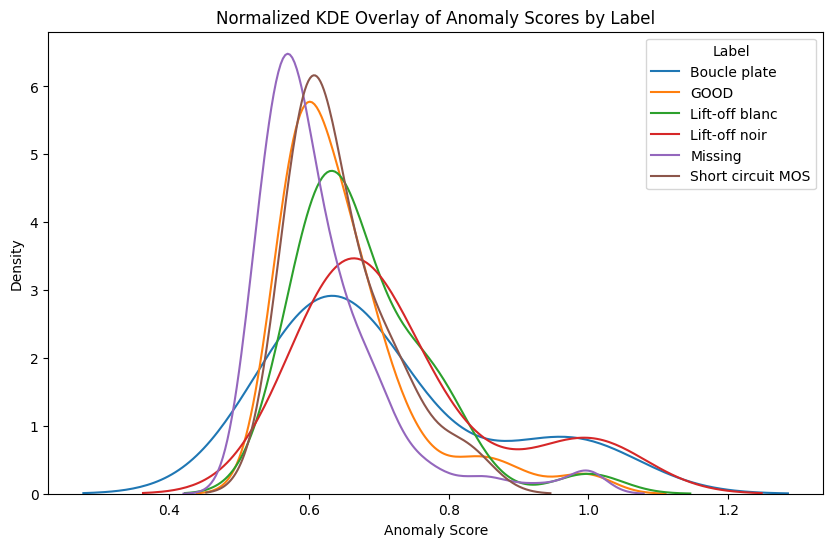

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
plt.figure(figsize=(10, 6))

# Loop through each label and plot the normalized KDE
for label in test_df["Label"].unique():
    sns.kdeplot(test_df[test_df["Label"] == label]["anomaly_score"], label=label, common_norm=False)

plt.xlabel("Anomaly Score")
plt.ylabel("Density")
plt.title("Normalized KDE Overlay of Anomaly Scores by Label")
plt.legend(title="Label")
plt.show()


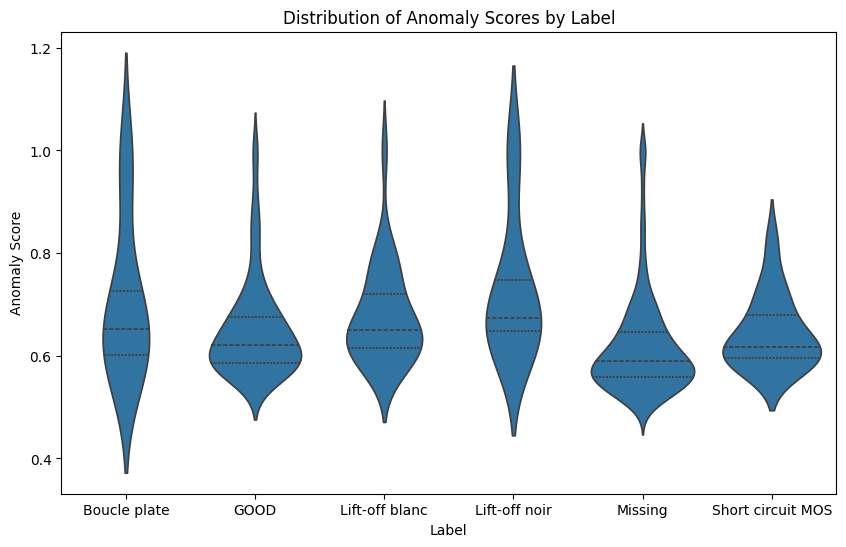

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=test_df["Label"], y=test_df["anomaly_score"], inner="quartile")
plt.xlabel("Label")
plt.ylabel("Anomaly Score")
plt.title("Distribution of Anomaly Scores by Label")
plt.show()


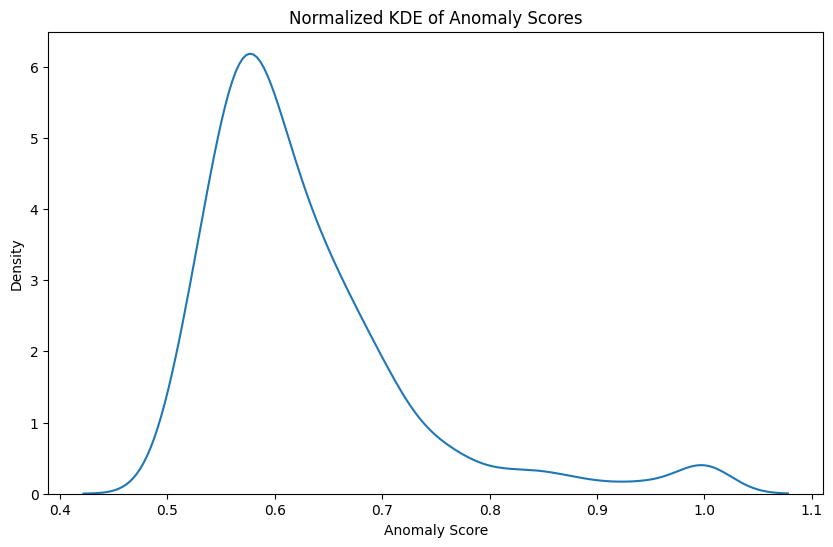

In [11]:
plt.figure(figsize=(10, 6))

# Plot the KDE for the 'anomaly_score' column (without differentiating by label)
sns.kdeplot(test_df["anomaly_score"], common_norm=False)

plt.xlabel("Anomaly Score")
plt.ylabel("Density")
plt.title("Normalized KDE of Anomaly Scores")
plt.show()

# Real Testing

In [12]:
model_path = "/content/drive/MyDrive/Data/8/EfficientAD/weights/torch/model.pt"

In [13]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import torch
from torchvision.transforms.v2.functional import to_dtype, to_image
from anomalib.deploy import TorchInferencer

# 1 - Instantiate the TorchInferencer
inferencer = TorchInferencer(
    path=model_path,
    device="gpu"
)

# Directory containing the images
input_dir = "/dev/shm/input_test"
#input_dir = "/dev/shm/3/test_dataset"
results = []  # List to store each image's result

# 2 - Loop through each image in the directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_path = os.path.join(input_dir, filename)

        # 3 - Execute prediction
        result = inferencer.predict(image=image_path)
        anomaly_score = result.pred_score
        prediction = ""
        # Calculate anomaly score based on prediction label
        if result.pred_score < 0.5:
            # When the label indicates normal, we invert the anomaly score
            prediction = "Normal"
        else:
            prediction = "Abnormal"

        # Append the results to the list
        results.append({
            "filename": filename,
            "anomaly_score": anomaly_score,
            "prediction": prediction
        })

# 4 - Create a DataFrame from the results
df = pd.DataFrame(results)
print(df)

/usr/local/lib/python3.11/dist-packages/anomalib/deploy/inferencers/torch_inferencer.py:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path, map_locati

                                               filename  anomaly_score  \
0     10b0c36579c608d2e75e2d660846009fca886b92c674ba...       0.568369   
1     8e7bee7f365ba606a9c9a54f964888f1d265b3f0c50822...       0.637571   
2     9fe847a508bdff0d38e792564851c104f9fe0a43857b39...       0.873655   
3     dbcfd65a5faabb5dc341a6c86978432a743f90bca68fae...       0.564480   
4     7f212d97555a629d6a907a2a15c8ce52a06fe285e667eb...       0.527089   
...                                                 ...            ...   
1050  687d28950337f8d5d45f336e43a2bc81a4b054ae47f4e8...       0.617624   
1051  2a4290dd5f2b026de9ec0ef37faf2029c4357d99fd6dd3...       0.497283   
1052  fb9c4ed679249e950f25671686af022be971bc6c607de7...       0.508141   
1053  ba624f93ea0e7575c973d699872d22d56c4a3da2294e58...       0.638461   
1054  feedf3c223c1ef98db420cdf63dd15af9c264664dc69c9...       0.570697   

     prediction  
0      Abnormal  
1      Abnormal  
2      Abnormal  
3      Abnormal  
4      Abnormal  
...

In [14]:
df["anomaly_score"].describe()

,anomaly_score
count,1055.000000
mean,0.654243
std,0.130416
min,0.497283
25%,0.564117
50%,0.606000
75%,0.694480
max,1.000000


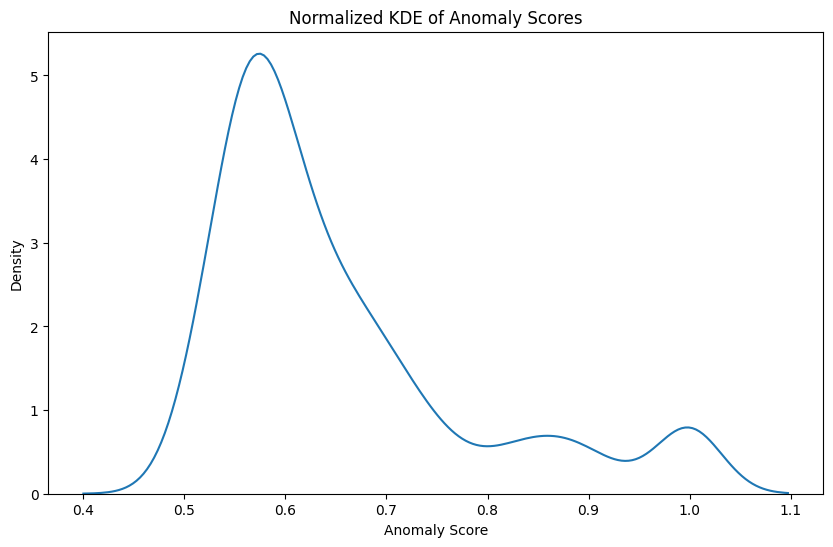

In [15]:
plt.figure(figsize=(10, 6))

# Plot the KDE for the 'anomaly_score' column (without differentiating by label)
sns.kdeplot(df["anomaly_score"], common_norm=False)

plt.xlabel("Anomaly Score")
plt.ylabel("Density")
plt.title("Normalized KDE of Anomaly Scores")
plt.show()


In [16]:
df["anomaly_score"].quantile(0.9)

0.8749258253281462

In [17]:
(df["anomaly_score"] > 0.85).mean()

0.11848341232227488

In [ ]:
(df["anomaly_score"] > 0.88).mean()

0.1061611374407583

In [17]:
(df["anomaly_score"] > 0.99).mean()

0.06066350710900474

In [ ]:
df[df["anomaly_score"] < 0.84].describe()

In [18]:
# Create the 'Label' column based on the anomaly score condition
df['anomaly_label'] = df['anomaly_score'].apply(lambda x: 'abnormal' if x > 0.99 else 'normal')

# Optionally, you can create a numeric label (1 for abnormal, 0 for normal) for easier analysis
df['anomaly_label_numeric'] = df['anomaly_label'].apply(lambda x: 1 if x == 'abnormal' else 0)

# Check the result
print(df[['anomaly_score', 'anomaly_label', 'anomaly_label_numeric']].head())


   anomaly_score anomaly_label  anomaly_label_numeric
0       0.568369        normal                      0
1       0.637571        normal                      0
2       0.873655        normal                      0
3       0.564480        normal                      0
4       0.527089        normal                      0


In [19]:
df.drop(columns=["prediction"], inplace=True)

In [20]:
df.to_csv("/content/drive/MyDrive/Data/8/EfficientAD/test_results.csv", index=False)

# Merging

In [2]:
import pandas as pd
df_labels = pd.read_csv("/content/drive/MyDrive/Data/7/EfficientAD/test_results.csv")  # File with filename and label
df_anomalies = pd.read_csv("/content/drive/MyDrive/Data/6/results.csv")  # File with filename and anomaly_label_numeric

# Merge both dataframes on 'filename'
df_merged = pd.merge(df_labels, df_anomalies, on="filename", how="inner")

# Display the first few rows of the merged dataframe
df_merged.head()

,filename,anomaly_score,anomaly_label,anomaly_label_numeric,label
0,10b0c36579c608d2e75e2d660846009fca886b92c674ba...,0.535632,normal,0,4
1,8e7bee7f365ba606a9c9a54f964888f1d265b3f0c50822...,0.620258,normal,0,2
2,9fe847a508bdff0d38e792564851c104f9fe0a43857b39...,0.819373,normal,0,1
3,dbcfd65a5faabb5dc341a6c86978432a743f90bca68fae...,0.567997,normal,0,2
4,7f212d97555a629d6a907a2a15c8ce52a06fe285e667eb...,0.520861,normal,0,5


In [3]:
label_mapping = {
    0: 1,
    1: 0,
    2: 2,
    3: 3,
    4: 4,
    5: 5
}

# Apply the mapping to the 'label' column
df_merged["label"] = df_merged["label"].replace(label_mapping)

# Display the updated DataFrame
df_merged.head()

,filename,anomaly_score,anomaly_label,anomaly_label_numeric,label
0,10b0c36579c608d2e75e2d660846009fca886b92c674ba...,0.535632,normal,0,4
1,8e7bee7f365ba606a9c9a54f964888f1d265b3f0c50822...,0.620258,normal,0,2
2,9fe847a508bdff0d38e792564851c104f9fe0a43857b39...,0.819373,normal,0,0
3,dbcfd65a5faabb5dc341a6c86978432a743f90bca68fae...,0.567997,normal,0,2
4,7f212d97555a629d6a907a2a15c8ce52a06fe285e667eb...,0.520861,normal,0,5


In [4]:
# Set 'label' to 6 where 'anomaly_label_numeric' is 1
df_merged.loc[df_merged["anomaly_label_numeric"] == 1, "label"] = 6

# Display the updated DataFrame
df_merged.head(30)

,filename,anomaly_score,anomaly_label,anomaly_label_numeric,label
0,10b0c36579c608d2e75e2d660846009fca886b92c674ba...,0.535632,normal,0,4
1,8e7bee7f365ba606a9c9a54f964888f1d265b3f0c50822...,0.620258,normal,0,2
2,9fe847a508bdff0d38e792564851c104f9fe0a43857b39...,0.819373,normal,0,0
3,dbcfd65a5faabb5dc341a6c86978432a743f90bca68fae...,0.567997,normal,0,2
4,7f212d97555a629d6a907a2a15c8ce52a06fe285e667eb...,0.520861,normal,0,5
5,dec68c794d76dc2a017411e5b5801810a4f3e41e0c0d3d...,0.524290,normal,0,4
6,67406bc029971e414e61363c6f0997a1477c73480f2ea3...,0.594988,normal,0,5
7,052562e287286fbd27047e550d5dfdb043046efc724a5d...,0.647896,normal,0,4
8,55166fcf914352305706df6c2fc94884727d34e2cbb4b1...,0.652083,normal,0,4
9,235b0e4846b35c8b312fc030172348b2b02dc215261b10...,0.575463,normal,0,1


In [5]:
df_merged.drop(columns=["anomaly_label", "anomaly_label_numeric", "anomaly_score"], inplace=True)

In [6]:
df2 = pd.read_csv("/content/drive/MyDrive/Data/Y_random_nKwalR1.csv").drop(columns=["Label"])
df2.head()

,Unnamed: 0,filename,window,lib
0,0,15669dca9fa601ffded9be0f9cd48097d45e7e05d662b8...,2003,Die01
1,1,16a9a7106da45758c103a182306d6e2991634e0574edce...,2003,Die01
2,2,216d84546bb291a840ac2ad0752a828f1f3d64abf79191...,2003,Die01
3,3,219a89d631e95e19643566512d8bcc45233fe4fe0524c9...,2003,Die01
4,4,2a441bba89ae0a867b3ee938063d55538379f8e1298b3c...,2003,Die01


In [7]:
df_matched = df2.merge(df_merged, on="filename", how="inner")
df_matched.nunique()

,0
Unnamed: 0,1055
filename,1055
window,2
lib,4
label,7


In [8]:
df_matched.rename(columns={"label": "Label"}, inplace=True)

In [9]:
df_matched["Label"].value_counts()

,count
Label,
5,231
0,192
2,186
1,175
4,166
6,103
3,2


In [11]:
df_matched.to_csv("/content/drive/MyDrive/Data/merged_results6.csv", index=False)

In [11]:
import pandas as pd
df_anomalies = pd.read_csv("/content/drive/MyDrive/Data/6/results.csv")

In [13]:
label_mapping = {
    0: 1,
    1: 0,
    2: 2,
    3: 3,
    4: 4,
    5: 5
}
df_anomalies["label"] = df_anomalies["label"].replace(label_mapping)

In [15]:
df2 = pd.read_csv("/content/drive/MyDrive/Data/Y_random_nKwalR1.csv").drop(columns=["Label"])
df_matched = df2.merge(df_anomalies, on="filename", how="inner")
df_matched.rename(columns={"label": "Label"}, inplace=True)
df_matched.head()

,Unnamed: 0,filename,window,lib,label
0,0,15669dca9fa601ffded9be0f9cd48097d45e7e05d662b8...,2003,Die01,2
1,1,16a9a7106da45758c103a182306d6e2991634e0574edce...,2003,Die01,2
2,2,216d84546bb291a840ac2ad0752a828f1f3d64abf79191...,2003,Die01,5
3,3,219a89d631e95e19643566512d8bcc45233fe4fe0524c9...,2003,Die01,2
4,4,2a441bba89ae0a867b3ee938063d55538379f8e1298b3c...,2003,Die01,2


In [21]:
df_matched.to_csv("/content/drive/MyDrive/Data/merged_results2.csv", index=False)

# Data Preparation

In [ ]:
import os

# Define the data directory and file paths
data_dir = "/content/drive/MyDrive/Data/"
input_train_dir = os.path.join(data_dir, "input_train")
split_folder = os.path.join(data_dir, "2")

LIMIT_MISSING_TRAINING = False
MAX_MISSING_TRAINING = 3000
MAX_TRAIN_IMAGES = 400
MAX_TEST_IMAGES = 300

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Parameters to limit the number of images in train and test sets.


# Path to the original CSV file with all image metadata.
csv_path = "/content/drive/MyDrive/Data/Y_train_eVW9jym.csv"

# Read the CSV file.
df = pd.read_csv(csv_path)

# Lists to hold the splits
train_list = []
test_list = []

# Perform a stratified split for each combination of Label and lib.
# This ensures that every (Label, lib) group is represented in both splits.
for (label, lib), group in df.groupby(["Label", "lib"]):
    # If a group has only one sample, assign it to training (or you can decide otherwise)
    if len(group) < 2:
        train_list.append(group)
    else:
        train_group, test_group = train_test_split(group, test_size=0.2, random_state=42)
        train_list.append(train_group)
        test_list.append(test_group)

# Concatenate the groups back together.
train_df = pd.concat(train_list).reset_index(drop=True)
test_df = pd.concat(test_list).reset_index(drop=True)

if LIMIT_MISSING_TRAINING:
    missing_df = train_df[train_df["Label"] == "Missing"]
    other_df = train_df[train_df["Label"] != "Missing"]

    if len(missing_df) > MAX_MISSING_TRAINING:
        total_missing = len(missing_df)
        sampled_groups = []

        # For each subgroup in missing data (grouped by 'lib'), sample proportionally.
        for lib, group in missing_df.groupby("lib"):
            # Compute the number of samples to draw from this group.
            n_samples = round(len(group) / total_missing * MAX_MISSING_TRAINING)
            # Ensure that each non-empty group gets at least one sample.
            n_samples = max(n_samples, 1)
            sampled_groups.append(group.sample(n=n_samples, random_state=42))

        missing_df = pd.concat(sampled_groups)

    # Recombine the training data.
    train_df = pd.concat([other_df, missing_df]).reset_index(drop=True)


# Helper function to perform stratified sampling on a DataFrame
def stratified_sample(df, max_samples, group_cols=["Label", "lib"]):
    total = len(df)
    groups = []
    # Group by the desired columns and sample from each group proportionally.
    for name, group in df.groupby(group_cols):
        # Determine the number of samples for this group based on its proportion.
        n_samples = round(len(group) / total * max_samples)
        # Ensure at least one sample per group if the group exists.
        n_samples = max(min(n_samples, len(group)), 1)
        groups.append(group.sample(n=n_samples, random_state=42))
    return pd.concat(groups).reset_index(drop=True)


# Limit the number of images in the train and test sets using stratified sampling.
train_df = stratified_sample(train_df, MAX_TRAIN_IMAGES, group_cols=["Label", "lib"])
test_df = stratified_sample(test_df, MAX_TEST_IMAGES, group_cols=["Label", "lib"])

# Create a folder to store the new CSV splits.
os.makedirs(split_folder, exist_ok=True)

# Write the CSV files.
train_csv_path = os.path.join(split_folder, "train.csv")
test_csv_path = os.path.join(split_folder, "test.csv")
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print("Train and test CSV files have been saved in:", split_folder)

Train and test CSV files have been saved in: /content/drive/MyDrive/Data/3


In [ ]:
import pandas as pd
import shutil
import os

train_csv_path = os.path.join(split_folder, "train.csv")
test_csv_path = os.path.join(split_folder, "test.csv")

# Define output directories for the new train and test datasets
output_train_dir = os.path.join(split_folder, "train_dataset")
output_test_dir = os.path.join(split_folder, "test_dataset")

# Create the output directories if they don't exist
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_test_dir, exist_ok=True)

# Function to copy images based on CSV file content
def copy_images(csv_path, type, output_dir):
    df = pd.read_csv(csv_path)
    # Use unique filenames to avoid duplicate copying
    i = 0
    for filename in df["filename"]:
        source_path = os.path.join(input_train_dir, filename)
        if type == "train":
            dest_path = os.path.join(output_dir, f"_{i}" + filename)
            i += 1
        else:
            dest_path = os.path.join(output_dir, filename)
        # Check if source file exists before copying
        if os.path.exists(source_path):
            shutil.copy2(source_path, dest_path)
        else:
            print(f"Warning: {source_path} not found!")

# Copy images for training and testing sets
copy_images(train_csv_path, "train", output_train_dir)
copy_images(test_csv_path, "test", output_test_dir)

print("Images have been copied to the following directories:")
print("Train dataset:", output_train_dir)
print("Test dataset:", output_test_dir)

Images have been copied to the following directories:
Train dataset: /content/drive/MyDrive/Data/3/train_dataset
Test dataset: /content/drive/MyDrive/Data/3/test_dataset
